<a href="https://colab.research.google.com/github/MontMendez/EstadisticaVerano/blob/main/PROYECTO%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PORTADA

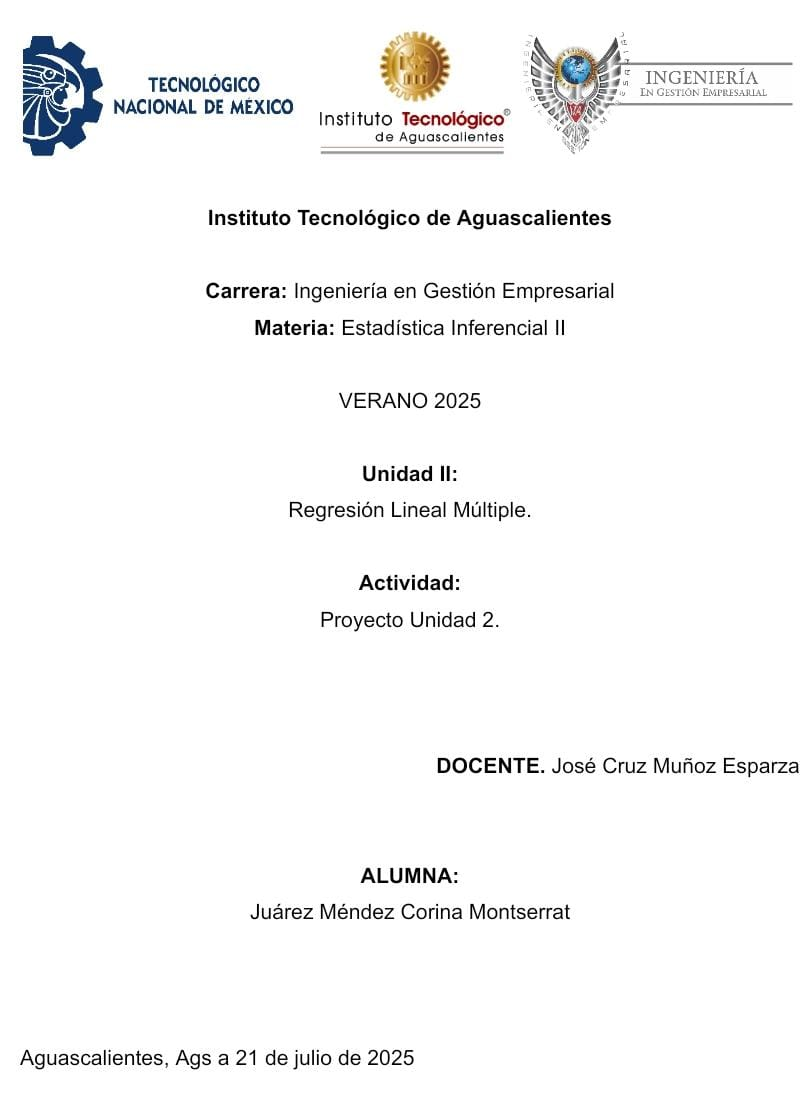

#INTRODUCCIÓN

Hoy en dia se observa gran variedad de carros usados que se venden a varios precios, en otras ocasiones se llegan a vender por partes, para darles un segundo uso a refacciones individuales, piezas para tu carro, etc...Es por ello que este proyecto tiene como objetivo analizar una base de un conjunto de datos que estan relacionados con las características de diferentes automóviles y lo más importante, su precio; con el fin de identificar los factores que más influyen en el precio de venta de los automóviles.

Esta base de datos contiene información sobre distintas especificaciones tanto técnicas, mecánicas y de diseño de los autos tal como, el tipo de combustible, aspiración (turbo o standard, número de puertas, tipo de carrocería, tracción, ubicación del motor, dimensiones (longitud, anchura, altura, peso), número de cilindros, tamaño del motor, sistema de combustible, potencia, el precio, entre muchas otras características.

Asi pues en este análisis aplicaremos regresión múltiple pero antes veremos las relaciones entre estas variables con el precio de los vehículos, utilizando pruebas estadísticas tales como pueden ser, ANOVA, Tukey y regresión múltiple para asi construir un posible modelo predictivo del precio.

# MARCO TEÓRICO

Las variables son cualquier característica que pueden tomar diferentes valores, ya sea altura, edad, precios o cualquier resultado de pruebas.

    Variable independiente "X": es aquella que se puede manipular, se considera como la causa aplicada en otras variables de estudio.

    Variable dependiente "Y": es el efecto de la variable independiente, su valor como su nombre lo dice, depende de los cambios que haya en "X".

Un histograma es un gráfico de barras que nos permite observar la frecuencia de una variable de estudio, esto con el fin de conocer su distribución e identificar valores altípicos.
       
Mapa de calor: representación gráfica que muestra la matriz de correlación entre variables, esto nos permite identificar relaciones fuertes y multicolinealidad.

Multicolinealidad: alta correlación entre variables independientes.

TÉCNICAS ESTADÍSTICAS PRINCIPALES

Análisis de Varianza (ANOVA): nos permite determinar si existe diferencia significativa entre varios grupos.
Ho: hipótesis nula; Hi: hipótesis alternativa

    Ho: B1=0, no hay diferencia entre grupos, no hay relación entre variables.
    Hi: B1=/0, hay diferencia entre grupos, hay relación entre variables.
    Alpha: es el nivel que indica la probabilidad de cometer el error tipo I (rechazar ho siendo verdadera).

Tukey: es utilizado para realizar comparaciones entre grupos, esto nos permite observar si es verdad que hay diferencia significativa entre grupos o no la hay. (Aunque ANOVA es más confiable).

Regresión Lineal Múltiple: nos permite modelar la relación que hay entre una variable dependiente y 2 o más variables independientes, con el fin de mejorar la relación y la predicción de estas mismas.

Se representa por la ecuación:
Y=B0+B1X1+B2X2+...+BnXn+E

# METODOLOGÍA

Se cargo la base de datos deseada previamente descargada de Kaggle y cargada en github con el fin de convertirla a datos crudos para finalmente trasladar la URL a este documento.

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/MontMendez/EstadisticaVerano/refs/heads/main/scrap%20price.csv")
df

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


Se establecio un código con el fin de conocer el nombre de las columnas y los datos en ellas para evitar sesgos o información incompleta.

In [ ]:
df.columns

Index(['ID', 'symboling', 'name', 'fueltypes', 'aspiration', 'doornumbers',
       'carbody', 'drivewheels', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   name              205 non-null    object 
 3   fueltypes         205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumbers       205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheels       205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Se eliminaron las columnas que no nos aportaban datos ordinales y que simplemente no aportaban algo a nuestro estudio.

In [ ]:
df = df.drop(columns=["ID","name"])
df

,symboling,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


Después, en el apartado "Variables", se analizo cada una de las variables utilizando para las númericas histogramas, y para las variables categóricas Anova y tukey. En las variables categóricas que nos indicaba anova que no habia relación, automaticamente fueron eliminadas ya que no nos aportarían nada, mientras que las que si daban relación, se conviertieron a variables númericas para facilitar su estudio.

Luego, se aplico un mapa de calor y ahi pudimos observar mejor la correlación de cada una de nuestras variables de estudio para identificar las que mejor correlación tenian con nuestra variable dependiente (Price).

Finalmente, se realizo la regresión múltiple para asi conocer que tanto se nos aporta en este modelo para una predición de precios de los vehículos.

## Variables

### symboling

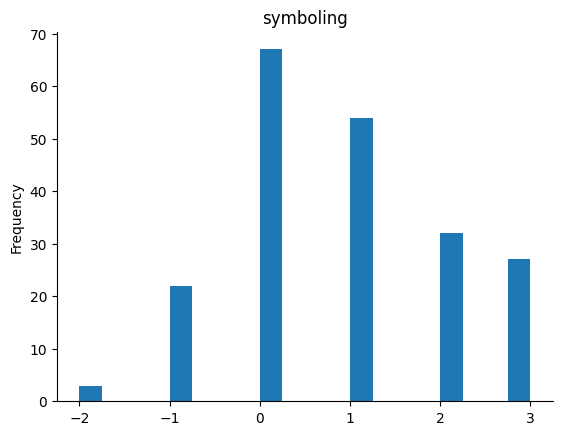

In [ ]:
from matplotlib import pyplot as plt
df['symboling'].plot(kind='hist', bins=20, title='symboling')
plt.gca().spines[['top', 'right',]].set_visible(False)

### fueltypes

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
modelo_lineal = ols('price ~ C(fueltypes)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova
#Ho. No hay relación entre variables, grupos iguales
#Hi. Hay relación entre variables, al menos un grupo es diferente.
#Alpha: 0.05

,df,sum_sq,mean_sq,F,PR(>F)
C(fueltypes),1.0,1.454053e+08,1.454053e+08,2.292741,0.131536
Residual,203.0,1.287423e+10,6.341987e+07,NaN,NaN


No se rechaza ho, por lo tanto no hay relación entre variables y no hay diferencia significativa en al menos un tipo de fueltypes.

In [ ]:
df = df.drop(columns=['fueltypes'])
df

,symboling,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


### aspiration

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
modelo_lineal = ols('price ~ C(aspiration)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova
#Ho. No hay relación entre variables, grupos iguales
#Hi. Hay relación entre variables, al menos un grupo es diferente.
#Alpha: 0.05

,df,sum_sq,mean_sq,F,PR(>F)
C(aspiration),1.0,4.121724e+08,4.121724e+08,6.636622,0.0107
Residual,203.0,1.260747e+10,6.210575e+07,NaN,NaN


Se rechaza ho, por lo tanto hay relación entre variables y hay diferencia entre aspirations

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj   lower     upper   reject
--------------------------------------------------------
   std  turbo 3686.8958 0.0107 865.0563 6508.7354   True
--------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

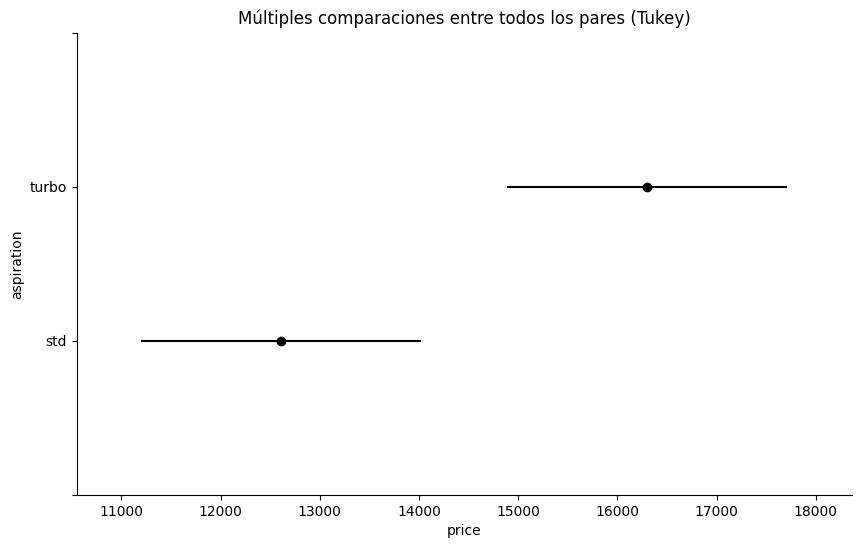

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['price'], groups=df['aspiration'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="aspiration", xlabel="price")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

In [ ]:
df['aspiration'] = df["aspiration"].map({"std":0, "turbo":1})
df

,symboling,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,0,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,0,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,0,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,0,four,sedan,fwd,front,99.8,176.6,66.2,54.3,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,0,four,sedan,4wd,front,99.4,176.6,66.4,54.3,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,0,four,sedan,rwd,front,109.1,188.8,68.9,55.5,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,1,four,sedan,rwd,front,109.1,188.8,68.8,55.5,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,0,four,sedan,rwd,front,109.1,188.8,68.9,55.5,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,1,four,sedan,rwd,front,109.1,188.8,68.9,55.5,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


### doornumbers

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
modelo_lineal = ols('price ~ C(doornumbers)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova
#Ho. No hay relación entre variables, grupos iguales
#Hi. Hay relación entre variables, al menos un grupo es diferente.
#Alpha: 0.05

,df,sum_sq,mean_sq,F,PR(>F)
C(doornumbers),1.0,1.319520e+07,1.319520e+07,0.205946,0.650448
Residual,203.0,1.300644e+10,6.407115e+07,NaN,NaN


No se rechaza ho, por lo tanto no hay relación y se considera que los grupos de doornumbers no tienen alguna diferencia.

In [ ]:
df = df.drop(columns=['doornumbers'])
df

,symboling,aspiration,carbody,drivewheels,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,0,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,0,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,0,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,0,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,1,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,0,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,1,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


### carbody

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
modelo_lineal = ols('price ~ C(carbody)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova
#Ho. No hay relación entre variables, grupos iguales
#Hi. Hay relación entre variables, al menos un grupo es diferente.
#Alpha: 0.05

,df,sum_sq,mean_sq,F,PR(>F)
C(carbody),4.0,1.801997e+09,4.504992e+08,8.031976,0.000005
Residual,200.0,1.121764e+10,5.608821e+07,NaN,NaN


Se rechaza ho, hay relación entre variables, al menos un tipo de carbody es diferente.

         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
   group1     group2    meandiff  p-adj     lower      upper    reject
----------------------------------------------------------------------
convertible   hardtop       318.0    1.0 -10816.1688 11452.1688  False
convertible hatchback -11513.8476 0.0035 -20283.7862  -2743.909   True
convertible     sedan  -7546.2292 0.1211 -16221.9036  1129.4453  False
convertible     wagon    -9518.54 0.0446 -18890.9142  -146.1658   True
    hardtop hatchback -11831.8476 0.0003 -19526.1224 -4137.5729   True
    hardtop     sedan  -7864.2292  0.038 -15450.8864  -277.5719   True
    hardtop     wagon    -9836.54 0.0123 -18210.9916 -1462.0884   True
  hatchback     sedan   3967.6184 0.0079     727.329  7207.9079   True
  hatchback     wagon   1995.3076 0.7832  -2808.1856  6798.8008  False
      sedan     wagon  -1972.3108 0.7669  -6601.4631  2656.8414  False
----------------------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

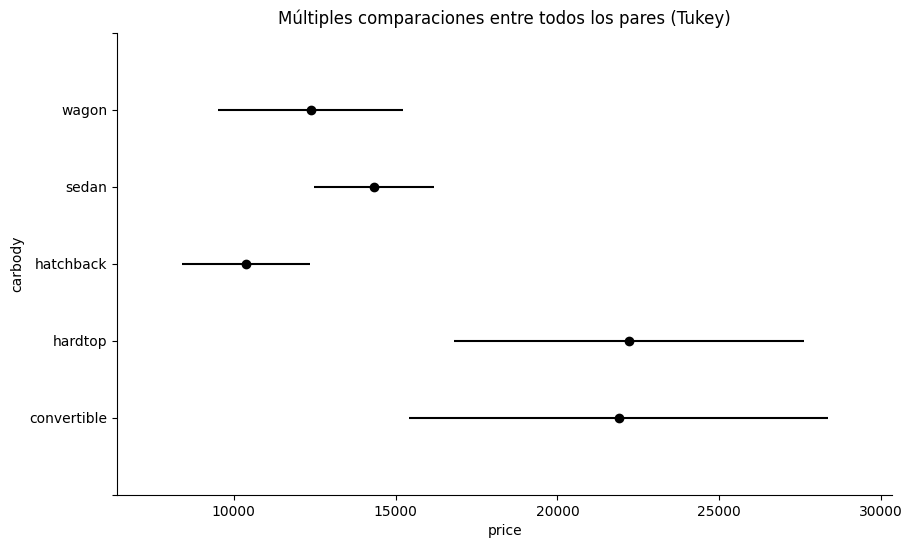

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['price'], groups=df['carbody'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="carbody", xlabel="price")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

In [ ]:
df['carbody'] = df["carbody"].map({"convertible":0, "hardtop":1, "hatchback":2, "sedan":3, "wagon":4})
df

,symboling,aspiration,carbody,drivewheels,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,0,0,rwd,front,88.6,168.8,64.1,48.8,2548,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,0,0,rwd,front,88.6,168.8,64.1,48.8,2548,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,0,2,rwd,front,94.5,171.2,65.5,52.4,2823,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,0,3,fwd,front,99.8,176.6,66.2,54.3,2337,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,0,3,4wd,front,99.4,176.6,66.4,54.3,2824,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,0,3,rwd,front,109.1,188.8,68.9,55.5,2952,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,1,3,rwd,front,109.1,188.8,68.8,55.5,3049,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,0,3,rwd,front,109.1,188.8,68.9,55.5,3012,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,1,3,rwd,front,109.1,188.8,68.9,55.5,3217,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


###drivewheels

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
modelo_lineal = ols('price ~ C(drivewheels)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova
#Ho. No hay relación entre variables, grupos iguales
#Hi. Hay relación entre variables, al menos un grupo es diferente.
#Alpha: 0.05

,df,sum_sq,mean_sq,F,PR(>F)
C(drivewheels),2.0,5.344065e+09,2.672033e+09,70.320553,6.632887e-24
Residual,202.0,7.675574e+09,3.799789e+07,NaN,NaN


Se rechaza ho, por lo tanto hay relación entre variables, al menos un grupo de drivewheels es diferente.

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj    lower      upper    reject
------------------------------------------------------------
   4wd    fwd -1848.1547 0.6614 -6878.3033   3181.994  False
   4wd    rwd  8823.3462 0.0002  3692.6151 13954.0773   True
   fwd    rwd 10671.5009    0.0  8537.8249 12805.1768   True
------------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

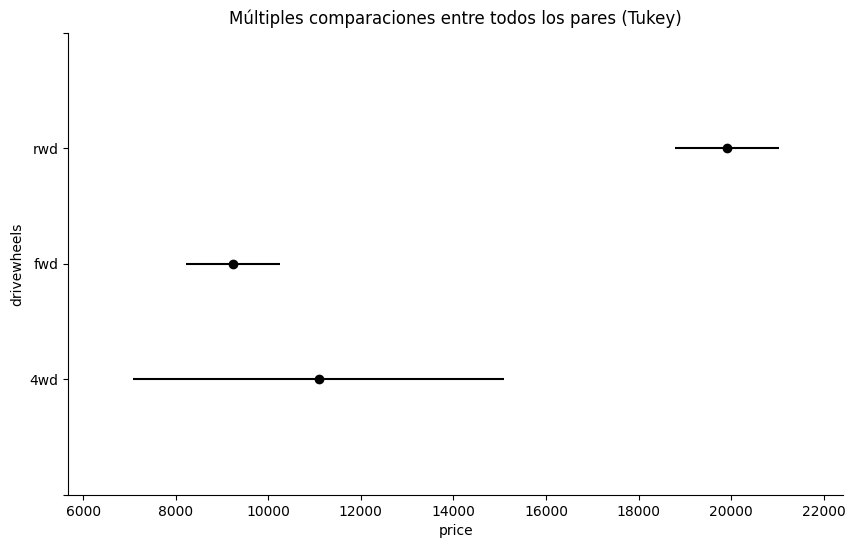

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['price'], groups=df['drivewheels'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="drivewheels", xlabel="price")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

In [ ]:
df['drivewheels'] = df["drivewheels"].map({"4wd":0, "fwd":1, "rwd":2})
df

,symboling,aspiration,carbody,drivewheels,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,0,0,2,front,88.6,168.8,64.1,48.8,2548,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,0,0,2,front,88.6,168.8,64.1,48.8,2548,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,0,2,2,front,94.5,171.2,65.5,52.4,2823,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,0,3,1,front,99.8,176.6,66.2,54.3,2337,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,0,3,0,front,99.4,176.6,66.4,54.3,2824,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,0,3,2,front,109.1,188.8,68.9,55.5,2952,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,1,3,2,front,109.1,188.8,68.8,55.5,3049,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,0,3,2,front,109.1,188.8,68.9,55.5,3012,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,1,3,2,front,109.1,188.8,68.9,55.5,3217,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


###enginelocation

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
modelo_lineal = ols('price ~ C(enginelocation)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova
#Ho. No hay relación entre variables, grupos iguales
#Hi. Hay relación entre variables, al menos un grupo es diferente.
#Alpha: 0.05

,df,sum_sq,mean_sq,F,PR(>F)
C(enginelocation),1.0,1.374973e+09,1.374973e+09,23.96974,0.000002
Residual,203.0,1.164467e+10,5.736289e+07,NaN,NaN


Se rechaza ho, por lo tanto hay relación entre variables, al menos un tipo de enginelocation es diferente.

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj   lower      upper    reject
-----------------------------------------------------------
 front   rear 21566.9026   0.0 12881.2771 30252.5282   True
-----------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

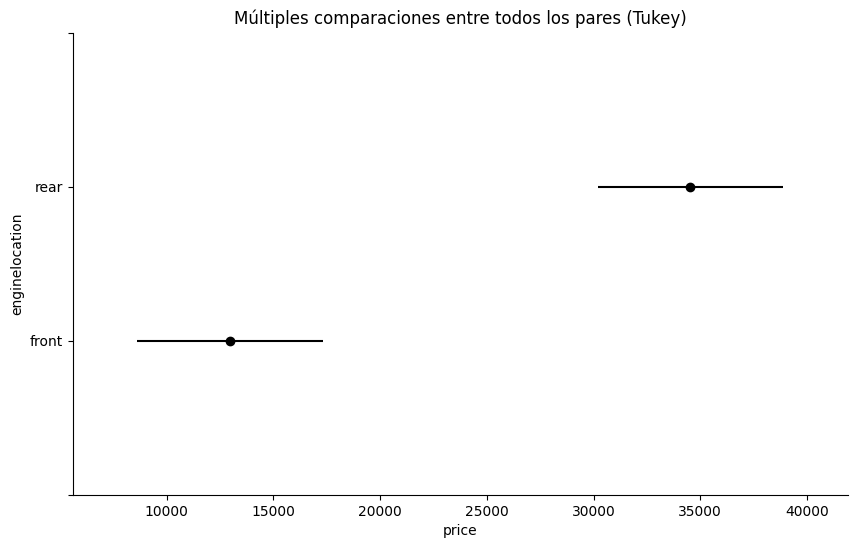

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['price'], groups=df['enginelocation'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="enginelocation", xlabel="price")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

In [ ]:
df['enginelocation'] = df["enginelocation"].map({"front":0, "rear":1})
df

,symboling,aspiration,carbody,drivewheels,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,0,0,2,0,88.6,168.8,64.1,48.8,2548,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,0,0,2,0,88.6,168.8,64.1,48.8,2548,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,0,2,2,0,94.5,171.2,65.5,52.4,2823,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,0,3,1,0,99.8,176.6,66.2,54.3,2337,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,0,3,0,0,99.4,176.6,66.4,54.3,2824,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,0,3,2,0,109.1,188.8,68.9,55.5,2952,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,1,3,2,0,109.1,188.8,68.8,55.5,3049,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,0,3,2,0,109.1,188.8,68.9,55.5,3012,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,1,3,2,0,109.1,188.8,68.9,55.5,3217,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


###wheelbase

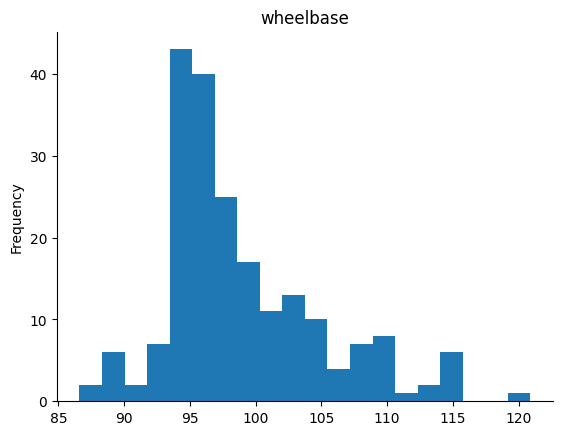

In [ ]:
from matplotlib import pyplot as plt
df['wheelbase'].plot(kind='hist', bins=20, title='wheelbase')
plt.gca().spines[['top', 'right',]].set_visible(False)

###carlength

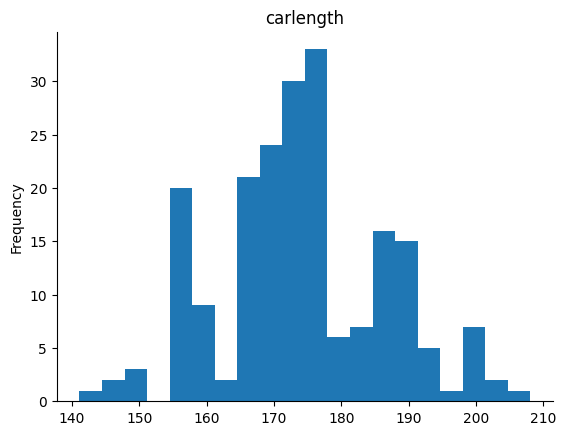

In [ ]:
from matplotlib import pyplot as plt
df['carlength'].plot(kind='hist', bins=20, title='carlength')
plt.gca().spines[['top', 'right',]].set_visible(False)

### carwidth

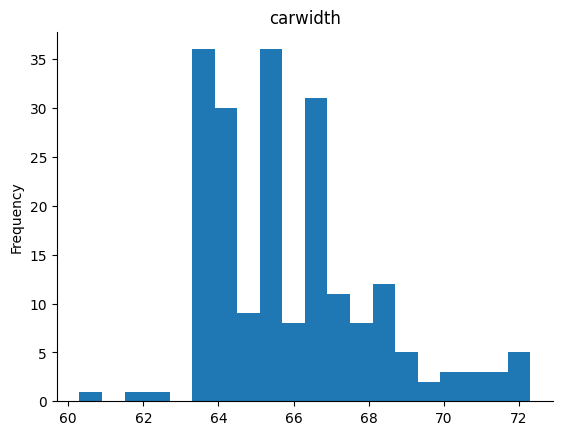

In [ ]:
from matplotlib import pyplot as plt
df['carwidth'].plot(kind='hist', bins=20, title='carwidth')
plt.gca().spines[['top', 'right',]].set_visible(False)

###carheight

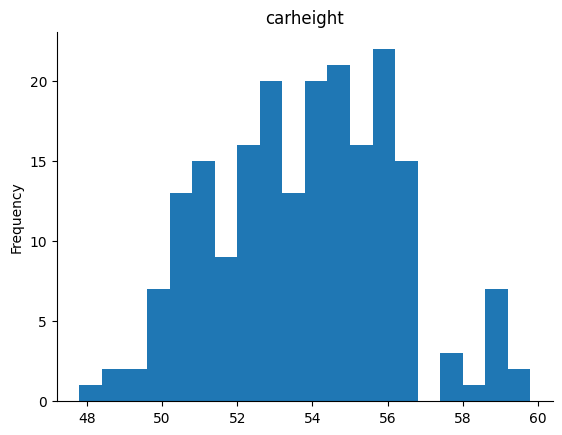

In [ ]:
from matplotlib import pyplot as plt
df['carheight'].plot(kind='hist', bins=20, title='carheight')
plt.gca().spines[['top', 'right',]].set_visible(False)

### curbweight

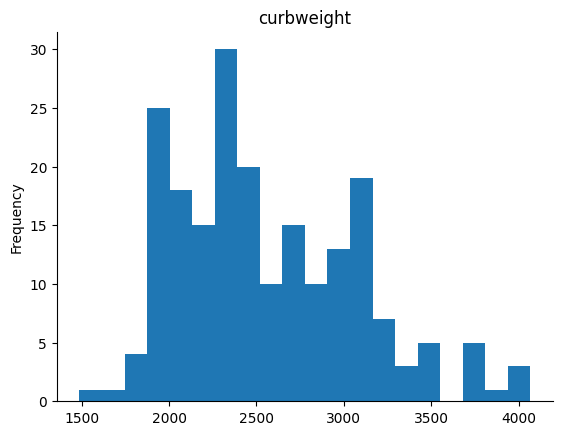

In [ ]:
from matplotlib import pyplot as plt
df['curbweight'].plot(kind='hist', bins=20, title='curbweight')
plt.gca().spines[['top', 'right',]].set_visible(False)

### enginetype

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
modelo_lineal = ols('price ~ C(enginetype)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova
#Ho. No hay relación entre variables, grupos iguales
#Hi. Hay relación entre variables, al menos un grupo es diferente.
#Alpha: 0.05

,df,sum_sq,mean_sq,F,PR(>F)
C(enginetype),6.0,2.880743e+09,4.801239e+08,9.37622,4.692665e-09
Residual,198.0,1.013890e+10,5.120655e+07,NaN,NaN


Se rechaza ho, por lo tanto hay relación entre variables, al menos un grupo de enginetype es diferente.

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower      upper    reject
--------------------------------------------------------------
  dohc  dohcv  13284.0833 0.5607  -8903.0101 35471.1768  False
  dohc      l  -3488.8333 0.8957 -12191.3274  5213.6607  False
  dohc    ohc  -6542.3682 0.0414 -12940.5691  -144.1674   True
  dohc   ohcf  -4377.8167 0.6955 -12633.7274  3878.0941  False
  dohc   ohcv   6981.9679 0.1888  -1551.5295 15515.4654  False
  dohc  rotor  -5096.4167 0.8802 -17403.6018  7210.7684  False
 dohcv      l -16772.9167  0.273 -38960.0101  5414.1768  False
 dohcv    ohc -19826.4516  0.089  -41215.016  1562.1128  False
 dohcv   ohcf    -17661.9 0.2084  -39677.662   4353.862  False
 dohcv   ohcv  -6302.1154 0.9793 -28423.4692 15819.2384  False
 dohcv  rotor    -18380.5 0.2505 -42213.2615  5452.2615  False
     l    ohc  -3053.5349 0.7896  -9451.7358   3344.666  False
     l   ohcf   -888.9833 0.9999  -9144.8941  7366.9274

Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

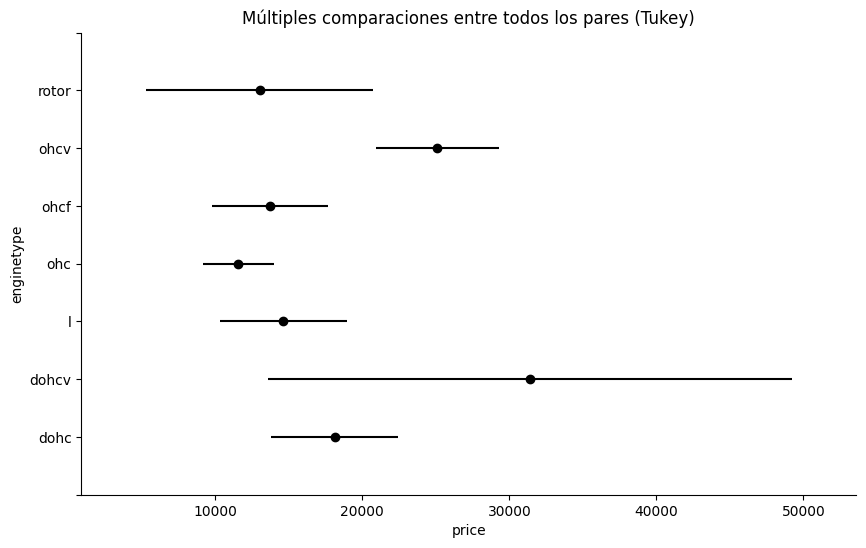

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['price'], groups=df['enginetype'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="enginetype", xlabel="price")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

In [ ]:
df['enginetype'] = df["enginetype"].map({"dohc":0, "dohcv":1, "l":2, "ohc":3, "ohcf":4, "ohcv":5, "rotor":6})
df

,symboling,aspiration,carbody,drivewheels,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,0,0,2,0,88.6,168.8,64.1,48.8,2548,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,0,0,2,0,88.6,168.8,64.1,48.8,2548,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,0,2,2,0,94.5,171.2,65.5,52.4,2823,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,0,3,1,0,99.8,176.6,66.2,54.3,2337,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,0,3,0,0,99.4,176.6,66.4,54.3,2824,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,0,3,2,0,109.1,188.8,68.9,55.5,2952,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,1,3,2,0,109.1,188.8,68.8,55.5,3049,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,0,3,2,0,109.1,188.8,68.9,55.5,3012,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,1,3,2,0,109.1,188.8,68.9,55.5,3217,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


### cylindernumber

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
modelo_lineal = ols('price ~ C(cylindernumber)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova
#Ho. No hay relación entre variables, grupos iguales
#Hi. Hay relación entre variables, al menos un grupo es diferente.
#Alpha: 0.05

,df,sum_sq,mean_sq,F,PR(>F)
C(cylindernumber),6.0,8.275757e+09,1.379293e+09,57.568881,8.065780e-41
Residual,198.0,4.743882e+09,2.395900e+07,NaN,NaN


Se rechaza ho, por lo tanto hay relación entre variables, al menos un cylindernumber es diferente.

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------
 eight   five -15769.6303    0.0 -23634.1031  -7905.1575   True
 eight   four -27114.3453    0.0 -33736.9575  -20491.733   True
 eight    six -13728.2667    0.0 -20896.2889  -6560.2444   True
 eight  three    -32249.1    0.0 -48221.9197 -16276.2803   True
 eight twelve     -1400.1    1.0 -17372.9197  14572.7197  False
 eight    two    -24380.1    0.0 -34161.4145 -14598.7855   True
  five   four  -11344.715    0.0 -15890.6218  -6798.8083   True
  five    six   2041.3636 0.9131  -3267.7623   7350.4895  False
  five  three -16479.4697 0.0245 -31708.9558  -1249.9837   True
  five twelve  14369.5303 0.0785   -859.9558  29599.0163  False
  five    two  -8610.4697 0.0455 -17124.0113    -96.9282   True
  four    six  13386.0786    0.0    10192.98  16579.1772   True
  four  three  -5134.7547 0.9426 -19761.

Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

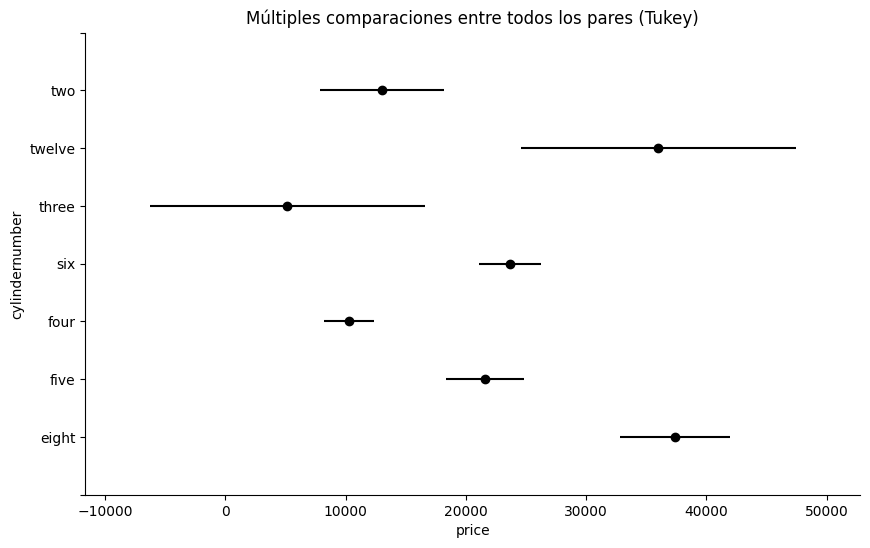

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['price'], groups=df['cylindernumber'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="cylindernumber", xlabel="price")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

In [ ]:
df['cylindernumber'] = df["cylindernumber"].map({"eight":8, "five":5, "four":4,
                                                 "six":6, "three":3, "twelve":12,
                                                 "two":2})
df

,symboling,aspiration,carbody,drivewheels,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,0,0,2,0,88.6,168.8,64.1,48.8,2548,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,0,0,2,0,88.6,168.8,64.1,48.8,2548,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,0,2,2,0,94.5,171.2,65.5,52.4,2823,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,0,3,1,0,99.8,176.6,66.2,54.3,2337,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,0,3,0,0,99.4,176.6,66.4,54.3,2824,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,0,3,2,0,109.1,188.8,68.9,55.5,2952,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,1,3,2,0,109.1,188.8,68.8,55.5,3049,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,0,3,2,0,109.1,188.8,68.9,55.5,3012,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,1,3,2,0,109.1,188.8,68.9,55.5,3217,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


### enginesize

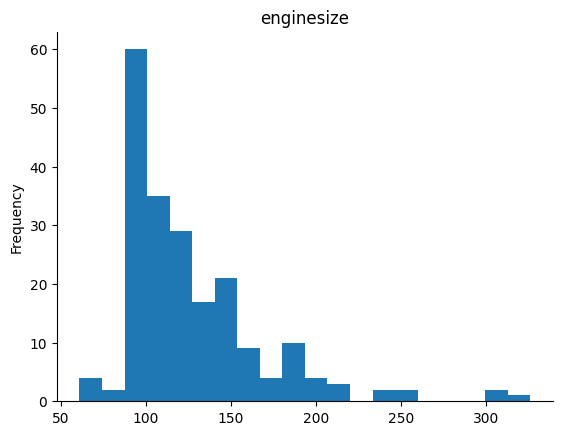

In [ ]:
from matplotlib import pyplot as plt
df['enginesize'].plot(kind='hist', bins=20, title='enginesize')
plt.gca().spines[['top', 'right',]].set_visible(False)

### fuelsystem

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
modelo_lineal = ols('price ~ C(fuelsystem)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova
#Ho. No hay relación entre variables, grupos iguales
#Hi. Hay relación entre variables, al menos un grupo es diferente.
#Alpha: 0.05

,df,sum_sq,mean_sq,F,PR(>F)
C(fuelsystem),7.0,4.651199e+09,6.644569e+08,15.641865,2.990386e-16
Residual,197.0,8.368441e+09,4.247939e+07,NaN,NaN


Se rechaza ho, por lo tanto hay relación entre variables, al menos un grupo de fuelsystem es diferente.

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj     lower      upper    reject
-------------------------------------------------------------
  1bbl   2bbl   -77.3939    1.0  -6580.5935  6425.8056  False
  1bbl   4bbl  4589.4545 0.9601  -8416.9445 17595.8536  False
  1bbl    idi  8282.6045 0.0191    786.7779 15778.4312   True
  1bbl    mfi  5408.4545 0.9933 -15448.1836 26265.0927  False
  1bbl   mpfi 10199.0574 0.0001    3835.728 16562.3868   True
  1bbl   spdi   3434.899 0.9388   -5540.369  12410.167  False
  1bbl   spfi  3492.4545 0.9996 -17364.1836 24349.0927  False
  2bbl   4bbl  4666.8485 0.9273  -7121.2017 16454.8987  False
  2bbl    idi  8359.9985    0.0    3263.026 13456.9709   True
  2bbl    mfi  5485.8485 0.9909 -14633.5717 25605.2686  False
  2bbl   mpfi 10276.4513    0.0   7069.6347 13483.2679   True
  2bbl   spdi  3512.2929 0.7978  -3583.2795 10607.8653  False
  2bbl   spfi  3569.8485 0.9994 -16549.5717 23689.2686  False
  4bbl  

Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

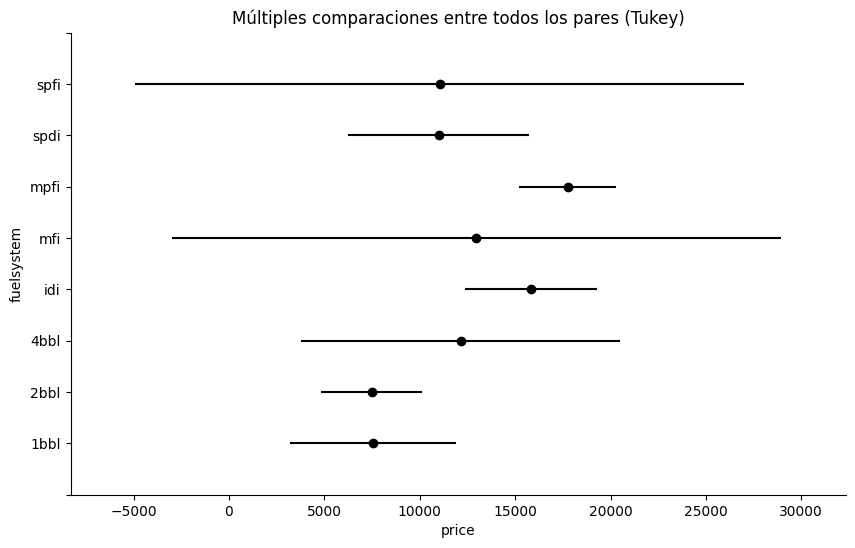

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['price'], groups=df['fuelsystem'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="fuelsystem", xlabel="price")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

In [ ]:
df['fuelsystem'] = df["fuelsystem"].map({"1bbl":0, "2bbl":1, "4bbl":2, "idi":3,
                                         "mfi":4, "mpfi":5, "spdi":6, "spfi":7})
df

,symboling,aspiration,carbody,drivewheels,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,0,0,2,0,88.6,168.8,64.1,48.8,2548,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,0,0,2,0,88.6,168.8,64.1,48.8,2548,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,0,2,2,0,94.5,171.2,65.5,52.4,2823,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,0,3,1,0,99.8,176.6,66.2,54.3,2337,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,0,3,0,0,99.4,176.6,66.4,54.3,2824,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,0,3,2,0,109.1,188.8,68.9,55.5,2952,...,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,1,3,2,0,109.1,188.8,68.8,55.5,3049,...,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,0,3,2,0,109.1,188.8,68.9,55.5,3012,...,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,1,3,2,0,109.1,188.8,68.9,55.5,3217,...,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


### boreratio

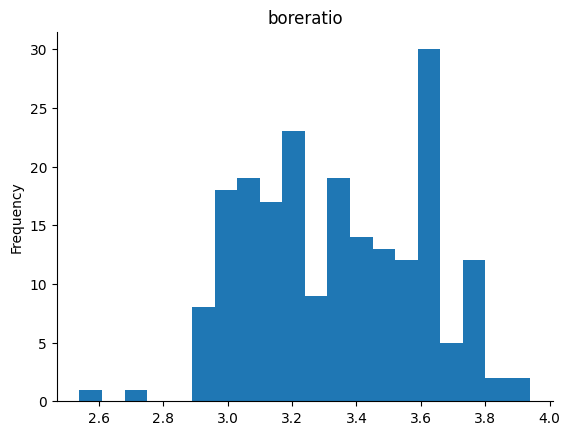

In [ ]:
from matplotlib import pyplot as plt
df['boreratio'].plot(kind='hist', bins=20, title='boreratio')
plt.gca().spines[['top', 'right',]].set_visible(False)

### stroke

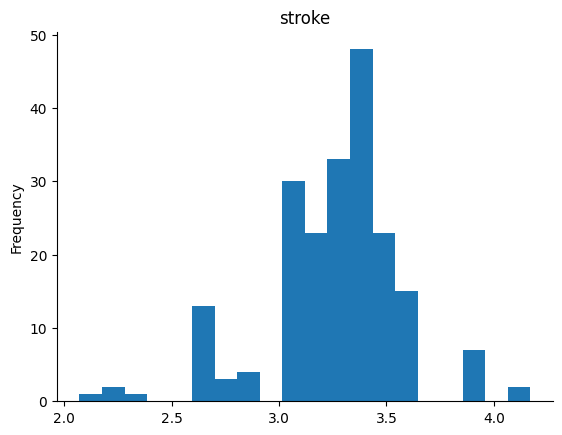

In [ ]:
from matplotlib import pyplot as plt
df['stroke'].plot(kind='hist', bins=20, title='stroke')
plt.gca().spines[['top', 'right',]].set_visible(False)

### compressionratio

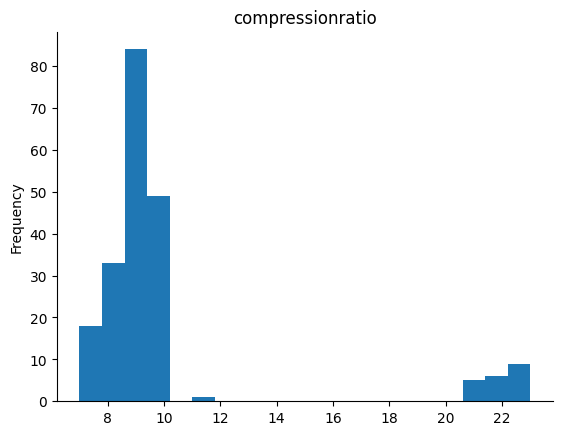

In [ ]:
from matplotlib import pyplot as plt
df['compressionratio'].plot(kind='hist', bins=20, title='compressionratio')
plt.gca().spines[['top', 'right',]].set_visible(False)

###horsepower

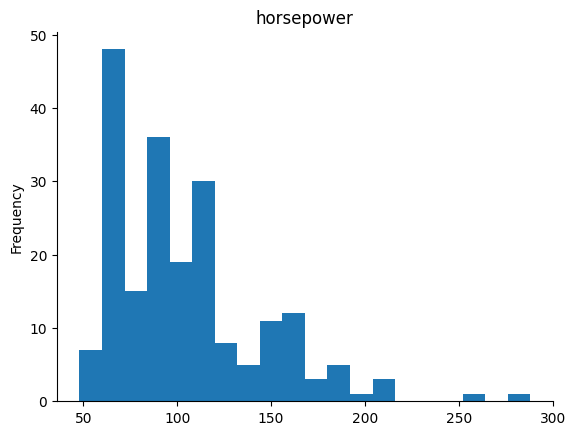

In [ ]:
from matplotlib import pyplot as plt
df['horsepower'].plot(kind='hist', bins=20, title='horsepower')
plt.gca().spines[['top', 'right',]].set_visible(False)

### peakrpm

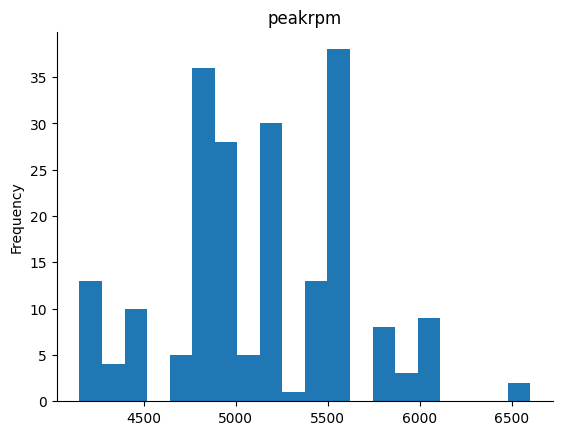

In [ ]:
from matplotlib import pyplot as plt
df['peakrpm'].plot(kind='hist', bins=20, title='peakrpm')
plt.gca().spines[['top', 'right',]].set_visible(False)

### citympg

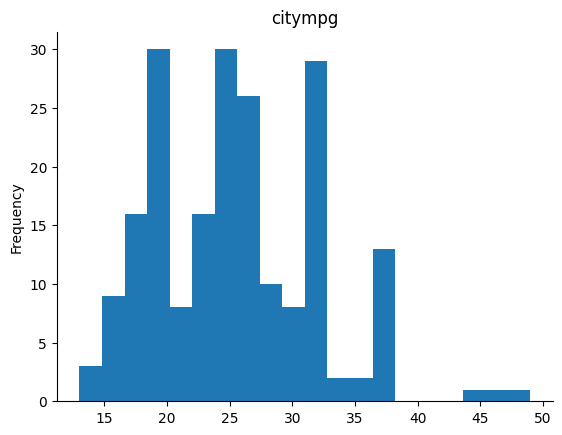

In [ ]:
from matplotlib import pyplot as plt
df['citympg'].plot(kind='hist', bins=20, title='citympg')
plt.gca().spines[['top', 'right',]].set_visible(False)

### highwaympg

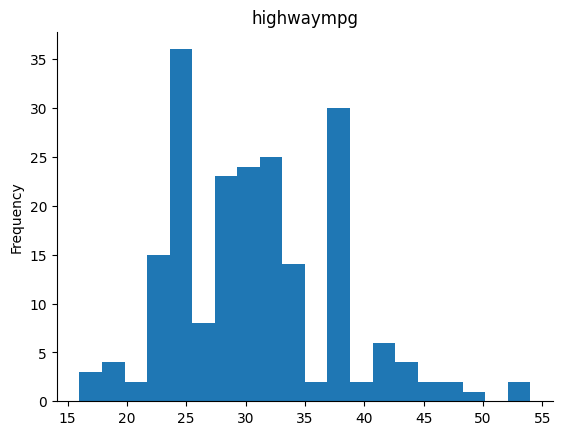

In [ ]:
from matplotlib import pyplot as plt
df['highwaympg'].plot(kind='hist', bins=20, title='highwaympg')
plt.gca().spines[['top', 'right',]].set_visible(False)

### price

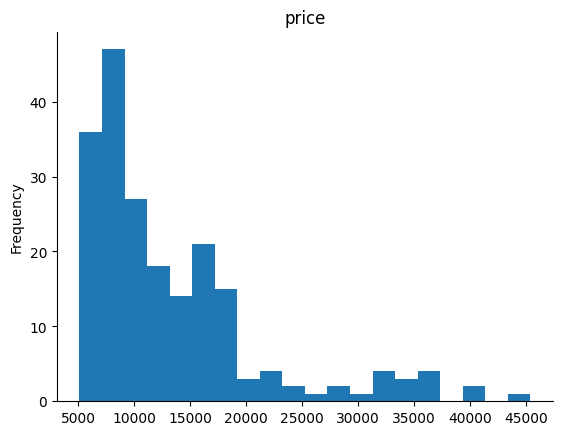

In [ ]:
from matplotlib import pyplot as plt
df['price'].plot(kind='hist', bins=20, title='price')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   aspiration        205 non-null    int64  
 2   carbody           205 non-null    int64  
 3   drivewheels       205 non-null    int64  
 4   enginelocation    205 non-null    int64  
 5   wheelbase         205 non-null    float64
 6   carlength         205 non-null    float64
 7   carwidth          205 non-null    float64
 8   carheight         205 non-null    float64
 9   curbweight        205 non-null    int64  
 10  enginetype        205 non-null    int64  
 11  cylindernumber    205 non-null    int64  
 12  enginesize        205 non-null    int64  
 13  fuelsystem        205 non-null    int64  
 14  boreratio         205 non-null    float64
 15  stroke            205 non-null    float64
 16  compressionratio  205 non-null    float64
 1

In [ ]:
# Mi variable dependiente (Y) es price

#symboling: variable númerica discreta no presenta datos altípicos.
#fueltypes: no hubo diferencia significativa entre fueltypes se elimina la
#           columna.
#aspiration: si hubo diferencia significativa  entre aspirations
#            "std":0, "turbo":1
#doornumbers: no hubo diferencia significativa entre doornumbers se elimina la
#             columna.
#carbody: si hubo diferencia significativa  entre carbodys
#         "convertible":0, "hardtop":1, "hatchback":2, "sedan":3, "wagon":4
#drivewheels: si hubo diferencia significativa  entre drivewheels
#             "4wd":0, "fwd":1, "rwd":2
#enginelocation: si hubo diferencia significativa  entre enginelocations
#                "front":0, "rear":1
#wheelbase: variable númerica no presenta datos altípicos.
#carlength: variable númerica no presenta datos altípicos.
#carwidth: variable númerica no presenta datos altípicos.
#carheight: variable númerica continua
#curbweight: variable númerica continua
#enginetype: si hubo diferencia significativa  entre enginetypes
#            "dohc":0, "dohcv":1, "l":2, "ohc":3, "ohcf":4, "ohcv":5, "rotor":6
#cylindernumber: si hubo diferencia significativa  entre cylindernumbers
#               "eight":8, "five":5, "four":4, "six":6, "three":3, "twelve":12,
#               "two":2
#enginesize: variable númerica no presenta datos altípicos.
#fuelsystem: si hubo diferencia significativa  entre fuelsystems
#            "1bbl":0, "2bbl":1, "4bbl":2, "idi":3, "mfi":4, "mpfi":5, "spdi":6,
#            "spfi":7
#boreratio: variable númerica.
#stroke: variable númerica.
#compressionratio: variable númerica.
#horsepower: variable númerica.
#peakrpm: variable númerica no presenta datos altípicos.
#citympg: variable númerica no presenta datos altípicos.
#highwaympg: variable númerica no presenta datos altípicos.
#price: variable númerica.

# RESULTADOS

## Mapa de calor

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5]),
 [Text(0, 0.5, 'symboling'),
  Text(0, 1.5, 'aspiration'),
  Text(0, 2.5, 'carbody'),
  Text(0, 3.5, 'drivewheels'),
  Text(0, 4.5, 'enginelocation'),
  Text(0, 5.5, 'wheelbase'),
  Text(0, 6.5, 'carlength'),
  Text(0, 7.5, 'carwidth'),
  Text(0, 8.5, 'carheight'),
  Text(0, 9.5, 'curbweight'),
  Text(0, 10.5, 'enginetype'),
  Text(0, 11.5, 'cylindernumber'),
  Text(0, 12.5, 'enginesize'),
  Text(0, 13.5, 'fuelsystem'),
  Text(0, 14.5, 'boreratio'),
  Text(0, 15.5, 'stroke'),
  Text(0, 16.5, 'compressionratio'),
  Text(0, 17.5, 'horsepower'),
  Text(0, 18.5, 'peakrpm'),
  Text(0, 19.5, 'citympg'),
  Text(0, 20.5, 'highwaympg'),
  Text(0, 21.5, 'price')])

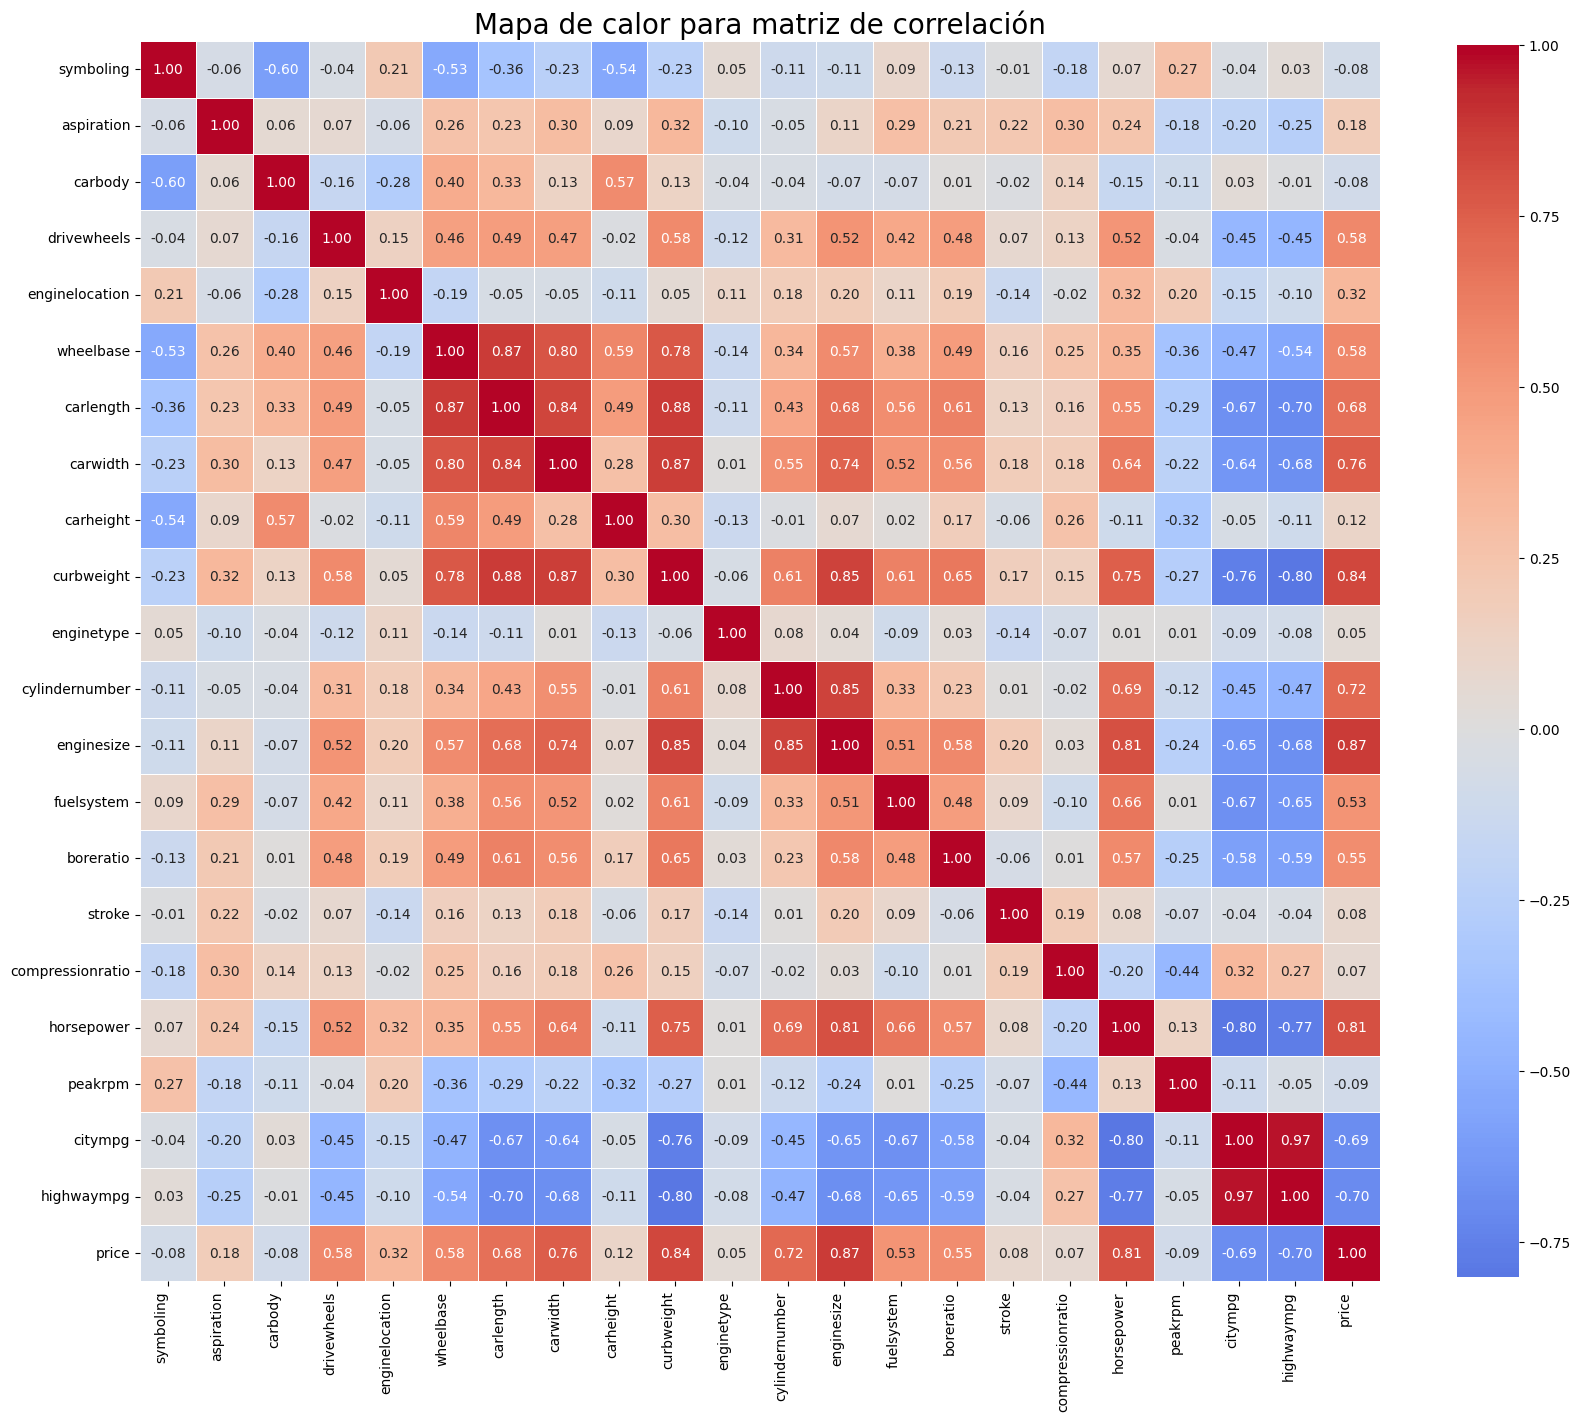

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

matriz_de_correlacion = df.corr()

plt.figure(figsize=(20,20),dpi=100)

sns.heatmap(
    matriz_de_correlacion,
    annot=True,
    fmt="0.2f",
    cmap="coolwarm",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink":0.8},
    center=0)

plt.title("Mapa de calor para matriz de correlación", fontsize=20)
plt.xticks(rotation=90, ha= "right")
plt.yticks(rotation=0)
#el mapa de calor nos muestra las r de pearson

## Regresión Múltiple



Coeficiente de determinación:  0.7946

Intervalo de confianza para b1 de  95%
 90.6008 < b1 <  136.4821

valor-p de Shapiro:  0.0000

valor_p de Breusch-Pagan:  0.0000



,df,sum_sq,mean_sq,F,PR(>F)
enginesize,1.0,9.948686e+09,9.948686e+09,751.420569,5.402680e-70
curbweight,1.0,3.965065e+08,3.965065e+08,29.947993,1.305973e-07
Residual,202.0,2.674447e+09,1.323984e+07,NaN,NaN


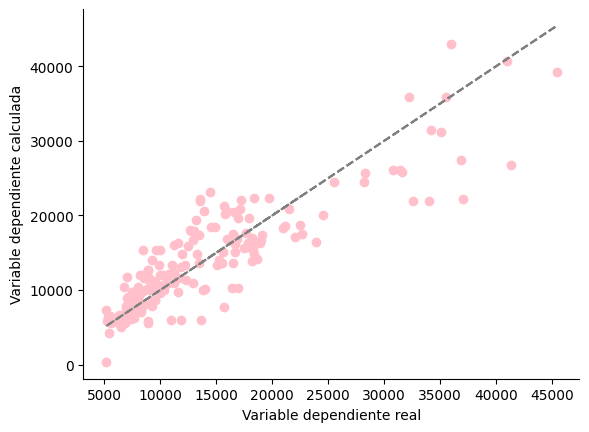

In [ ]:
x = df[["enginesize", "curbweight"]]
y = df["price"]
print("\n")

# # 2. Realice un diagrama de dispersión para estos datos.
# import matplotlib.pyplot as plt
# plt.figure(figsize = (16, 8), dpi = 100)
# plt.scatter(x, y, label = "Promedio final", color = 'red')
# plt.xlabel('Exámenes cortos') # nombrar eje x
# plt.ylabel('Promedio final') # nombrar eje y
# plt.gca().spines[["top","right"]].set_visible(False)

# 3. ¿Los datos soportan la suposición de linealidad?
# Sí

# 4. Calcule el coeficiente de correlación e interprete el resultado.
# from scipy.stats import pearsonr
# r, _ = pearsonr(x, y)
# print(f'Coeficiente de correlación: {r: 0.4f}\n')

# 6. Obtenga la recta de regresión ajustada y grafíquelo sobre el gráfico de
# dispersión.
import statsmodels.api as sm
x_constante = sm.add_constant(x)
modelo = sm.OLS(y, x_constante).fit()

yc = modelo.predict(x_constante)
plt.figure()
plt.plot(y, y, color = 'grey', linestyle = '--')

# 5. Calcule el coeficiente de determinación e interprete el resultado.
from sklearn.metrics import r2_score  # recomendada
r2 = r2_score(y, yc)
print(f'Coeficiente de determinación: {r2: 0.4f}\n')

# 7. Obtenga un intervalo de confianza del 95% para la pendiente de la recta de
# regresión ajustada ( b1 )
nivel_de_confianza = 0.95
intervalo_de_confianza = modelo.conf_int(alpha = 1 - nivel_de_confianza)
intervalo_de_confianza_b1 = intervalo_de_confianza.iloc[1]
print(f'Intervalo de confianza para b1 de {nivel_de_confianza: 0.0%}')
print(f'{intervalo_de_confianza_b1[0]: 0.4f} < b1 < {intervalo_de_confianza_b1[1]: 0.4f}\n')

# 8. Calcule los residuales y trace un nuevo gráfico de dispersión. Comente,
# ¿Parece que se verifican los supuestos?
residuales = modelo.resid
plt.scatter(y, yc, color = 'pink')
plt.xlabel('Variable dependiente real')
plt.ylabel('Variable dependiente calculada')
plt.gca().spines[['top', 'right']].set_visible(False)

# 9. Realice la prueba de Shapiro para los residuales y comente el resultado.
from scipy.stats import shapiro
_, valor_p_sh = shapiro(residuales)
print(f'valor-p de Shapiro: {valor_p_sh: 0.4f}\n')

# 10. Realice la prueba de Brausch-Pagan para los residuales y comente el
# resultado.
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print(f'valor_p de Breusch-Pagan: {valor_p_bp: 0.4f}\n')

# 11. Tres estudiantes sacaron 70, 75 y 84 de calificación. Según la recta de
# regresión ajustada, ¿cuáles son los resultados esperados para estos tres alumnos?
#print(f'para x1 = 0.5, x2 =3, x3=34, y = {modelo.predict([1, 0.5, 3, 34])}')
#print(f'para x1 = 1.5, x2 =2, x3=50, y = {modelo.predict([1, 1.5, 2, 50])}')
#print(f'para x1 = 2.5, x2 =4, x3=40, y = {modelo.predict([1, 2.0, 4, 40])}\n')
# print(f'para x = 72, y = {modelo.get_prediction([1, 0.5]).summary_frame()}')

# 12. Realice una tabla ANOVA e interprete el resultado.
from statsmodels.formula.api import ols
# Y ~ X
modelo_lineal = ols("price ~ enginesize + curbweight", data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova

### Interpretación

Para este modelo utilicé como variables independientes "enginesize" y "curbweight", para lo cual ANOVA nos indico que si hay relación de ambas variables con mi variable dependiente (price), así mismo mi intervalo de confianza indicó que B1 si es diferente de 0, por lo que tambien afirma relación entre estas.

El coeficiente de determinación me esta indicando que de la variación que existe en mi precio del vehículo, el 79.46% se debe al tamaño del motor y al peso en vacío del auto; lo cual nos proporciona una buena proyección, sin embargo hay multicolinealidad.

Finalmente considero que este modelo es poco aplicable para conocer el precio de un vehículo ya que va tomando en cuenta varias especificaciones de este, sin embargo, no es un modelo que pueda arrojar datos muy precisos ya que existe multicolinealidad, el modelo es muy desbalanceado y si se aplica puede dar datos o valores imprecisos o que no se le haye una buena aplicación.

Por ello es más recomendable aplicar un modelo más preciso y adecuado..

## Regresión Múltiple 2



Coeficiente de determinación:  0.8138

Intervalo de confianza para b1 de  95%
 59.7163 < b1 <  110.0430

valor-p de Shapiro:  0.0000

valor_p de Breusch-Pagan:  0.0000



,df,sum_sq,mean_sq,F,PR(>F)
enginesize,1.0,9.948686e+09,9.948686e+09,824.954708,4.461203e-73
curbweight,1.0,3.965065e+08,3.965065e+08,32.878708,3.558410e-08
horsepower,1.0,2.504523e+08,2.504523e+08,20.767753,8.990333e-06
Residual,201.0,2.423995e+09,1.205968e+07,NaN,NaN


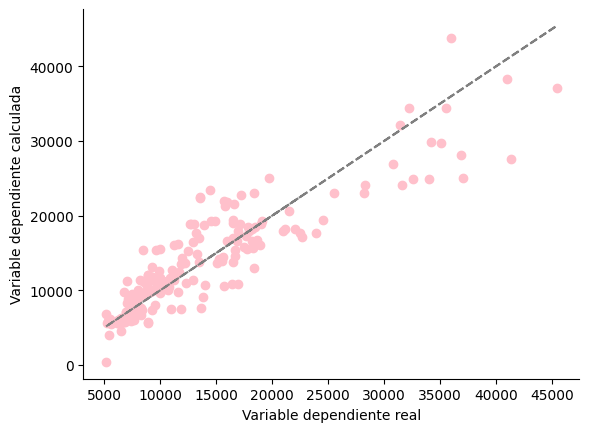

In [ ]:
x = df[["enginesize", "curbweight", "horsepower"]]
y = df["price"]
print("\n")

# # 2. Realice un diagrama de dispersión para estos datos.
# import matplotlib.pyplot as plt
# plt.figure(figsize = (16, 8), dpi = 100)
# plt.scatter(x, y, label = "Promedio final", color = 'red')
# plt.xlabel('Exámenes cortos') # nombrar eje x
# plt.ylabel('Promedio final') # nombrar eje y
# plt.gca().spines[["top","right"]].set_visible(False)

# 3. ¿Los datos soportan la suposición de linealidad?
# Sí

# 4. Calcule el coeficiente de correlación e interprete el resultado.
# from scipy.stats import pearsonr
# r, _ = pearsonr(x, y)
# print(f'Coeficiente de correlación: {r: 0.4f}\n')

# 6. Obtenga la recta de regresión ajustada y grafíquelo sobre el gráfico de
# dispersión.
import statsmodels.api as sm
x_constante = sm.add_constant(x)
modelo = sm.OLS(y, x_constante).fit()

yc = modelo.predict(x_constante)
plt.figure()
plt.plot(y, y, color = 'grey', linestyle = '--')

# 5. Calcule el coeficiente de determinación e interprete el resultado.
from sklearn.metrics import r2_score  # recomendada
r2 = r2_score(y, yc)
print(f'Coeficiente de determinación: {r2: 0.4f}\n')

# 7. Obtenga un intervalo de confianza del 95% para la pendiente de la recta de
# regresión ajustada ( b1 )
nivel_de_confianza = 0.95
intervalo_de_confianza = modelo.conf_int(alpha = 1 - nivel_de_confianza)
intervalo_de_confianza_b1 = intervalo_de_confianza.iloc[1]
print(f'Intervalo de confianza para b1 de {nivel_de_confianza: 0.0%}')
print(f'{intervalo_de_confianza_b1[0]: 0.4f} < b1 < {intervalo_de_confianza_b1[1]: 0.4f}\n')

# 8. Calcule los residuales y trace un nuevo gráfico de dispersión. Comente,
# ¿Parece que se verifican los supuestos?
residuales = modelo.resid
plt.scatter(y, yc, color = 'pink')
plt.xlabel('Variable dependiente real')
plt.ylabel('Variable dependiente calculada')
plt.gca().spines[['top', 'right']].set_visible(False)

# 9. Realice la prueba de Shapiro para los residuales y comente el resultado.
from scipy.stats import shapiro
_, valor_p_sh = shapiro(residuales)
print(f'valor-p de Shapiro: {valor_p_sh: 0.4f}\n')

# 10. Realice la prueba de Brausch-Pagan para los residuales y comente el
# resultado.
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print(f'valor_p de Breusch-Pagan: {valor_p_bp: 0.4f}\n')

# 11. Tres estudiantes sacaron 70, 75 y 84 de calificación. Según la recta de
# regresión ajustada, ¿cuáles son los resultados esperados para estos tres alumnos?
#print(f'para x1 = 0.5, x2 =3, x3=34, y = {modelo.predict([1, 0.5, 3, 34])}')
#print(f'para x1 = 1.5, x2 =2, x3=50, y = {modelo.predict([1, 1.5, 2, 50])}')
#print(f'para x1 = 2.5, x2 =4, x3=40, y = {modelo.predict([1, 2.0, 4, 40])}\n')
# print(f'para x = 72, y = {modelo.get_prediction([1, 0.5]).summary_frame()}')

# 12. Realice una tabla ANOVA e interprete el resultado.
from statsmodels.formula.api import ols
# Y ~ X
modelo_lineal = ols("price ~ enginesize + curbweight + horsepower", data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova

### Interpretación

En este otro modelo se agrego otra variable independiente "horsepower", teniendo ahora 3 variables independientes "enginesize", "curbweight", "horsepower".

Observamos que ANOVA nos indica que hay relación entre las variables, por lo cuál estas si influyen significativamente en el precio de un vehículo. El coeficiente de determinación me esta indicando que de la variación que existe en el precio, el 81.38% se debe al tamaño del motor, al peso en vacío y a los caballos fuerza del auto; lo cual nos proporciona una buena proyección, aumentanda en comparación al modelo anterior pero igualmente hay multicolinealidad.

Finalmente considero que este otro modelo es poco aplicable también para conocer el precio de un vehículo, no es un modelo que pueda arrojar datos muy precisos ya que el resto de la proyección se debe a otras variables no indicadas en esta base de datos y hay multicolinealidad. Es recomendable usar otro modelo más complejo.

#CONCLUSIÓN

El Análisis de Varianza (ANOVA) nos indicó que las variables categóricas como aspiration (tipo de aspiración), car body (tipo de carrocería), drive wheels (ruedas motrices), engine location (ubicación del motor), engine type (tipo de motor), cylinder number (número de cilindros) y fuel system (sistema de combustible) tienen un impacto significativo en el precio del automóvil. Esto indica que las diferentes características como las anteriores están asociadas con precios promedio distintos, aunque puede haber otros muchos factores que influyan en el precio y no se encuentren plasmadas en la base de datos elegida.

El mapa de calor mostró una fuerte correlación entre variables como enginesize (0.87), curbweight (0.84), horsepower (0.81) y carwidth (0.76), lo que sugiere que estas características numéricas son importantes predictores del precio.

Aunque el modelo muestra una buena capacidad de predición general, los supuestos de residuales indican que hay características no capturadas por el modelo que también influyen en el precio. Esto podría indicar que por ejemplo la marca, la reputación y demás tambien influyen en los precios.

Finalmente, este modelo podria no ser útil para analisis o predicciones para las empresas automotrices ya que no les permite comprender al 100 las caracteristicas que influyen en el precio de un auto, en las refacciones o piezas. Esto se debe a que hay multicolinealidad entre variables independientes, lo que puede llevar a datos erroneos y puede que empeore las predicciones. Es recomendable utilizar otros modelos que permitan una mejor estimación de precios y la identificación de las características que aportan mayor valor de prediccion.

#REFERENCIAS

Equipo editorial. (2024, 23 octubre). Histograma - Concepto, tipos, ejemplos y cómo crearlos. Concepto. https://share.google/FK0xgEVzJXwdm4SAH

Scribbr.com. Recuperado el 20 de julio de 2025, de https://www.scribbr.com/methodology/independent-and-dependent-variables/